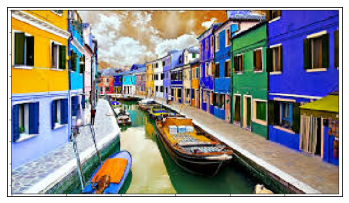

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('burano.png')
imgplot = plt.imshow(img)
plt.show(plt.xticks([]), plt.yticks([]))

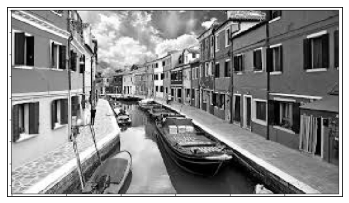

In [81]:
#convert to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.imshow(gray, cmap = 'gray');
plt.show(plt.xticks([]), plt.yticks([]))

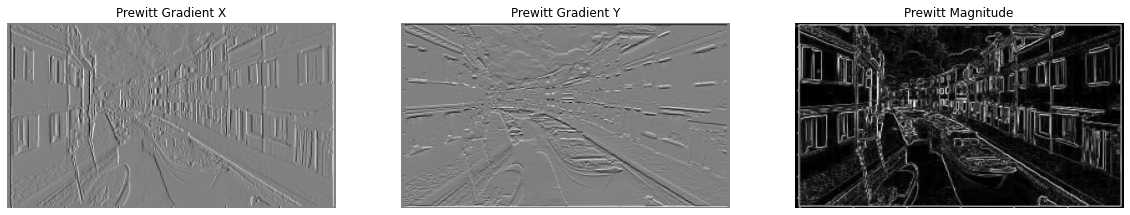

In [82]:
# Define the Prewitt kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply the Prewitt kernels to compute Gx and Gy
Gx_k = cv2.filter2D(gray, -1, kernel_x)
Gy_k = cv2.filter2D(gray, -1, kernel_y)

# Compute the gradient magnitude
grad_k=cv2.magnitude(Gx_k, Gy_k) 

# Display the Gx,Gy and Gradient images
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
ax1.imshow(Gx_k,cmap = 'gray')
ax1.set_title('Prewitt Gradient X')
ax1.set_axis_off()
ax2.imshow(Gy_k,cmap = 'gray')
ax2.set_title('Prewitt Gradient Y')
ax2.set_axis_off()
ax3.imshow(grad_k,cmap = 'gray')
ax3.set_title('Prewitt Magnitude')
ax3.set_axis_off()
plt.show()



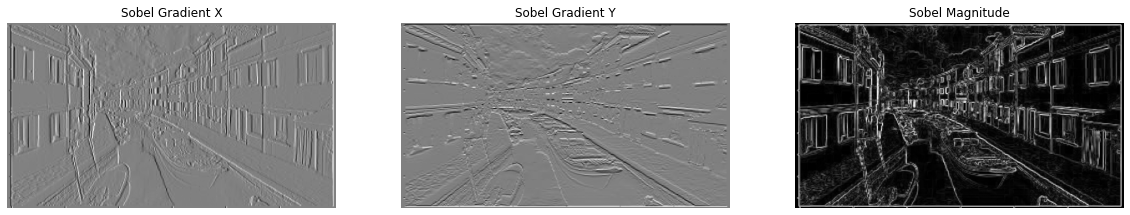

In [83]:
# Define the Sobel kernels
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply the Sobel kernels to compute Gx and Gy
Gx_s = cv2.filter2D(gray, -1, kernel_x)
Gy_s = cv2.filter2D(gray, -1, kernel_y)

# Compute the gradient magnitude
grad_s=cv2.magnitude(Gx_s, Gy_s) 

# Display the Gx,Gy and Gradient images
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
ax1.imshow(Gx_s,cmap = 'gray')
ax1.set_title('Sobel Gradient X')
ax1.set_axis_off()
ax2.imshow(Gy_s,cmap = 'gray')
ax2.set_title('Sobel Gradient Y')
ax2.set_axis_off()
ax3.imshow(grad_s,cmap = 'gray')
ax3.set_title('Sobel Magnitude')
ax3.set_axis_off()
plt.show()


min= 0.0
max= 2.9847288


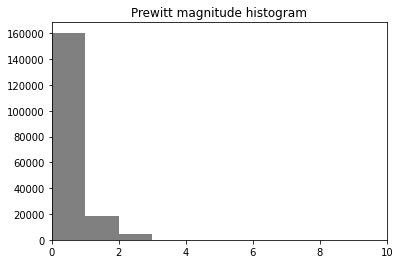

min= 0.0
max= 3.982381


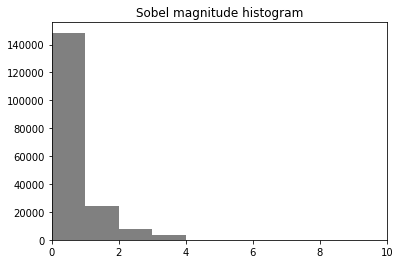

In [84]:
#Compute and plot histogram of source image
minvalue=np.min(grad_k)
maxvalue=np.max(grad_k)
print('min=',minvalue)
print('max=',maxvalue)
hist,bins = np.histogram(grad_k.flatten(),256,[0,256])
plt.title('Prewitt magnitude histogram')
plt.hist(grad_k.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,10])
plt.show()

minvalue=np.min(grad_s)
maxvalue=np.max(grad_s)
print('min=',minvalue)
print('max=',maxvalue)
hist,bins = np.histogram(grad_s.flatten(),256,[0,256])
plt.title('Sobel magnitude histogram')
plt.hist(grad_s.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,10])
plt.show()

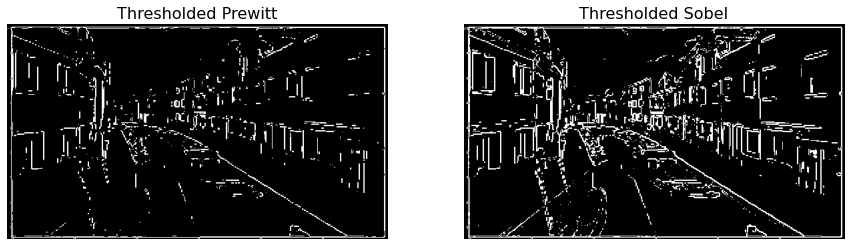

In [85]:
T=1.5
maxval=255

th1,dst1 = cv2.threshold(grad_k,T,maxval,cv2.THRESH_BINARY)
th2,dst2 = cv2.threshold(grad_s,T,maxval,cv2.THRESH_BINARY)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))

axs[0].imshow(dst1,'gray')
axs[0].axis('off')
axs[0].set_title('Thresholded Prewitt', fontsize=16)

axs[1].imshow(dst2,'gray')
axs[1].axis('off')
axs[1].set_title('Thresholded Sobel', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([])) 

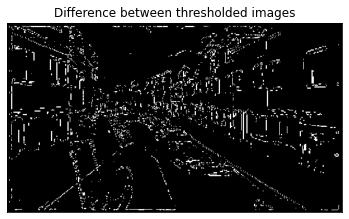

In [86]:
# Compute the difference between the two thresholded images
diff = cv2.absdiff(dst1, dst2)

# Display the difference image
plt.imshow(diff, cmap='gray')
plt.title('Difference between thresholded images')
plt.xticks([])
plt.yticks([])
plt.show()

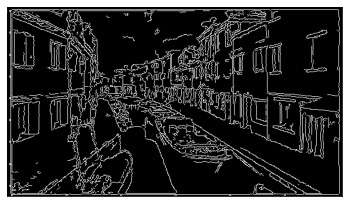

In [87]:
img=cv2.imread('burano.png') #reloaded due to conflicts beetween canny and mpimg.read 
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

edge_img=cv2.Canny(gray, 200, 400) # set the two thresholds 
imgplot = plt.imshow(edge_img,cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))
